[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SuperbTUM/ModelShare_Development/blob/master/notebooks/AutoML_dabl.ipynb)

In [3]:
!pip install aimodelshare --upgrade -q
!pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 9.1 MB/s 
     |████████████████████████████████| 11.2 MB 48.2 MB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 965 kB 60.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aimodelshare 0.0.141 requires scikit-learn==0.24.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
import aimodelshare as ai
import os

if not os.path.exists("credentials.txt"):
  from google.colab import files
  uploaded = files.upload()

In [1]:
from aimodelshare.aws import set_credentials

set_credentials(credential_file="credentials.txt", type="deploy_model")

AI Model Share login credentials set successfully.
AWS credentials set successfully.


Two ways to obtain dataset; one is import_quickstart_data, another is to load csv file.

In [3]:
X_train, X_test, y_train_labels, y_test_labels, example_data = ai.import_quickstart_data("covid_tweets")
# Each sample is a sentence
print(y_train_labels[0])


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.
fake


In [4]:
import dabl

AutoML with Simple Classifier

In [5]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_simple = tf_idf_vectorizer.fit(X_train)

def preprocessor(data):
  from sklearn.feature_extraction.text import TfidfVectorizer
  tf1_new = TfidfVectorizer(vocabulary = tfidf_simple.vocabulary_)
  new_tfidf_df = tf1_new.fit_transform(data)
  new_tfidf_df = new_tfidf_df.todense()
  return new_tfidf_df

X_train_processed = preprocessor(X_train)
X_test_processed = preprocessor(X_test)
y_train_labels_processed = np.asarray(list(map(lambda x: 0 if x == "fake" else 1, y_train_labels))).reshape(len(X_train), 1)
y_test_labels_processed = np.asarray(list(map(lambda x: 0 if x == "fake" else 1, y_test_labels)))

print(X_train_processed.shape)
print(y_train_labels_processed.shape)
print(np.concatenate((X_train_processed, y_train_labels_processed), axis=1).shape)

pd_tweets = pd.DataFrame(np.concatenate((X_train_processed, y_train_labels_processed), axis=1), columns=["feature_" + str(i) for i in range(X_train_processed.shape[1])] + ["classification"])
ec = dabl.SimpleClassifier(random_state=0).fit(pd_tweets, target_col="classification")


(6505, 18039)
(6505, 1)
(6505, 18040)
Running DummyClassifier(random_state=0)
accuracy: 0.525 average_precision: 0.475 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.344
=== new best DummyClassifier(random_state=0) (using recall_macro):
accuracy: 0.525 average_precision: 0.475 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.344

Running GaussianNB()
accuracy: 0.722 average_precision: 0.846 roc_auc: 0.862 recall_macro: 0.731 f1_macro: 0.715
=== new best GaussianNB() (using recall_macro):
accuracy: 0.722 average_precision: 0.846 roc_auc: 0.862 recall_macro: 0.731 f1_macro: 0.715

Running MultinomialNB()
accuracy: 0.752 average_precision: 0.822 roc_auc: 0.864 recall_macro: 0.750 f1_macro: 0.750
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.752 average_precision: 0.822 roc_auc: 0.864 recall_macro: 0.750 f1_macro: 0.750

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=0)
accuracy: 0.689 average_precision: 0.607 roc_auc: 0.689 recall_macro: 0

In [11]:
ec.score(X_test_processed, y_test_labels_processed)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.8092457420924575

In [9]:
ec.est_

Pipeline(steps=[('easypreprocessor',
                 EasyPreprocessor(types=               continuous  dirty_float  low_card_int  categorical   date  \
feature_0           False        False         False        False  False   
feature_1           False        False         False        False  False   
feature_2           False        False         False        False  False   
feature_3           False        False         False        False  False   
feature_4           False        False         False        False  False   
...                   ...          ...           ...          ...    ...   
feature_18034       False        False         False        False  False   
feature_18035       Fal...
               free_string  useless  
feature_0            False     True  
feature_1            False     True  
feature_2            False     True  
feature_3            False     True  
feature_4            False     True  
...                    ...      ...  
feature_18034        F

In [28]:
ec.est_.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'easypreprocessor', 'logisticregression', 'easypreprocessor__force_imputation', 'easypreprocessor__scale', 'easypreprocessor__types', 'easypreprocessor__verbose', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [22]:
base_estimator = list(ec.est_)[-1]
base_estimator.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': 'balanced',
 'random_state': 0,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 22,
 'classes_': array([0., 1.]),
 'n_iter_': array([20], dtype=int32),
 'coef_': array([[-0.58150483,  0.32354477,  0.69930801,  0.22453462, -0.87075023,
          0.02705371,  0.64900543,  0.22718278,  0.13748566,  0.78976738,
         -0.28089262,  1.16602244,  0.3681201 ,  0.179193  ,  0.27195772,
          0.25899921,  0.17273496,  0.37023221,  0.35822756,  0.50380581,
          0.49189813,  0.37529225]]),
 'intercept_': array([0.59213332])}

In [23]:
import joblib
joblib.dump(ec.est_, 'best_estimator.pkl')

with open('best_estimator.pkl', "rb") as f:
  pipelined_model = joblib.load(f)
f.close()

print(pipelined_model)

Pipeline(steps=[('easypreprocessor',
                 EasyPreprocessor(types=               continuous  dirty_float  low_card_int  categorical   date  \
feature_0           False        False         False        False  False   
feature_1           False        False         False        False  False   
feature_2           False        False         False        False  False   
feature_3           False        False         False        False  False   
feature_4           False        False         False        False  False   
...                   ...          ...           ...          ...    ...   
feature_18034       False        False         False        False  False   
feature_18035       Fal...
               free_string  useless  
feature_0            False     True  
feature_1            False     True  
feature_2            False     True  
feature_3            False     True  
feature_4            False     True  
...                    ...      ...  
feature_18034        F

In [14]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


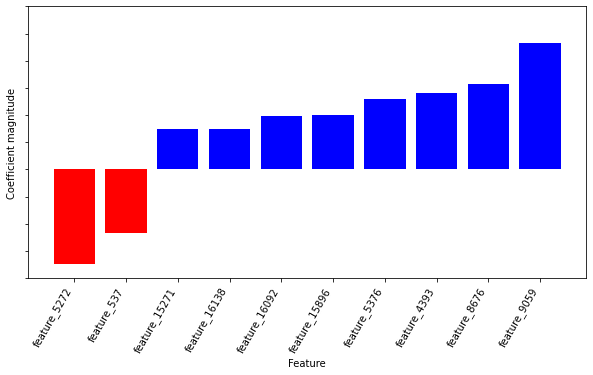

In [6]:
dabl.explain(ec)

Save pipelined model to onnx

In [33]:
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features there are
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, X_train_processed.shape[1]]))]  # Insert correct number of features in preprocessed data

onnx_model = model_to_onnx(ec.est_, framework='sklearn',
              initial_types=initial_type,
              transfer_learning=False, deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

Fine tune

In [30]:
from sklearn.experimental import enable_halving_search_cv # experimental
from sklearn.model_selection import HalvingGridSearchCV

parameters = {"logisticregression__C": [1, 10, 100], "logisticregression__multi_class": ["auto", "multinomial"]}

sh = HalvingGridSearchCV(ec.est_,
              parameters,
              cv=5,
              factor=2,
              #resource="n_estimators",
              #max_resources=30,
              aggressive_elimination=False,
              random_state=0).fit(X_train_processed, y_train_labels_processed.ravel())

sh.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

Pipeline(steps=[('easypreprocessor',
                 EasyPreprocessor(types=               continuous  dirty_float  low_card_int  categorical   date  \
feature_0           False        False         False        False  False   
feature_1           False        False         False        False  False   
feature_2           False        False         False        False  False   
feature_3           False        False         False        False  False   
feature_4           False        False         False        False  False   
...                   ...          ...           ...          ...    ...   
feature_18034       False        False         False        False  False   
feature_18035       Fal...
               free_string  useless  
feature_0            False     True  
feature_1            False     True  
feature_2            False     True  
feature_3            False     True  
feature_4            False     True  
...                    ...      ...  
feature_18034        F

In [31]:
best_estimator = sh.best_estimator_
best_estimator.score(X_test_processed, y_test_labels_processed)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.8077858880778589

AutoML with AnyClassifier

In [10]:
ac = dabl.AnyClassifier().fit(pd_tweets, target_col="classification")

best classifier:  LogisticRegression(C=10, multi_class='multinomial')
best score: 0.825


In [12]:
ac.score(X_test_processed, y_test_labels_processed)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.8097323600973236

AutoML with explainable model

In [ ]:
xc = dabl.ExplainableClassifier().fit(pd_tweets, target_col="classification") # not implemented yet

AutoML with [params grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv # experimental
from sklearn.model_selection import HalvingGridSearchCV

parameters = {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10]}
base_estimator = RandomForestClassifier(random_state=0)
sh = HalvingGridSearchCV(base_estimator,
              parameters,
              cv=5,
              factor=2,
              resource="n_estimators",
              max_resources=30,
              aggressive_elimination=False,
              random_state=0).fit(X_train_processed, y_train_labels_processed.ravel())

sh.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=24,
                       random_state=0)

In [ ]:
best_estimator = sh.best_estimator_
best_estimator.score(X_test_processed, y_test_labels_processed)

0.8525547445255475